# Detecting event clustering

We often talk about events such as protests happening in 'waves' or 'clusters' - but it's possible that we are just seeing patterns in randomness, where none actually exist. Humans are good at that.

In [1]:
%pylab inline
import numpy as np
from statsmodels.tsa import stattools

Populating the interactive namespace from numpy and matplotlib


### Uncorrelated values
For example, we can generate a timeseries of 'protests' which we know has no clustering in it, as each day is independent of the day beforehand. In this case, our eyes still pick out the areas where there appear to be more events and look like clusters even though they are not.

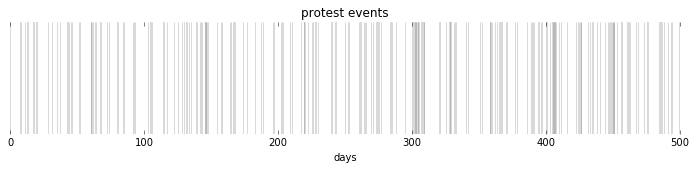

In [2]:
npts = 500
data = np.random.geometric(p=.7, size=npts)-1
plt.figure(figsize=(12,2))
plt.vlines(x=range(npts), ymin=0, ymax=1, linewidth=data, alpha=.15)
plt.xlabel('days')
plt.yticks([])
plt.box('off')
plt.title('protest events');

We can see that there are no real clusters by looking at the autocorrelation of the timeseries: we look at the correlation of the timeseries with a lagged version of itself. If there is correlation between the timeseries and the timeseries lagged by one day, then we expect that there is some clustering happening which makes it more likely than random that a protest on one day will be followed by a protest the next day. 

In this dataset, however, we see that there is autocorrelation with lag of $0$ as must definitionally be the case, and only sporadic, noisy indications of correlation with any other lag.

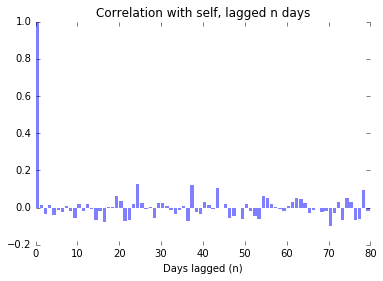

In [3]:
nlags = 80
plt.bar(range(nlags+1), stattools.acf(data, nlags=nlags), alpha=.5, linewidth=0)
plt.title('Correlation with self, lagged n days')
plt.xlabel('Days lagged (n)')
plt.box('off')
plt.xlim(0,80);

### Correlated with a single sin wave
Now let's assume that we have a sin wave as an underlying 'protest' driving phenomenon, and that the measured protests are just a noisy sample from that underlying function.

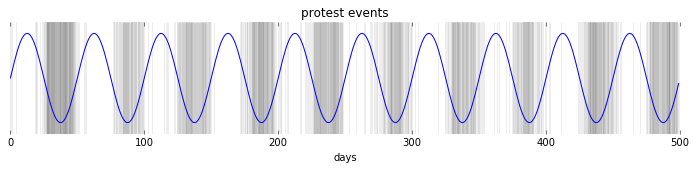

In [4]:
# correlated data
period=50
sine = .4*np.sin(2*np.pi*np.arange(npts)/(period)) + .5
data = np.random.geometric(p=sine, size=npts)-1

plt.figure(figsize=(12,2))
plt.vlines(x=range(npts), ymin=0, ymax=1, linewidth=data, alpha=.07)
plt.plot(sine)
plt.xlabel('days')
plt.yticks([])
plt.box('off')
plt.title('protest events');

There is still noise surrounding the protest events, but we can clearly see the influence of the underlying mechanism. (I've chosen a really clear example here!)

In the following figure, we see strong autocorrelation near 0, which tells us that protests are likely to come in clumps.

We also see that there is strong autocorrelation around 50 days, which tells us in this case the period of the underlying function. 

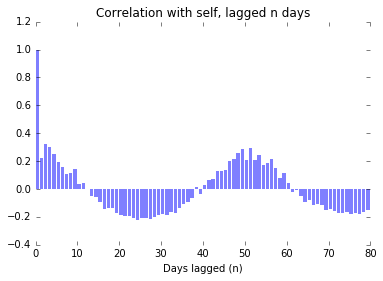

In [5]:
nlags = 80
plt.bar(range(nlags+1), stattools.acf(data, nlags=nlags), alpha=.5, linewidth=0)
plt.title('Correlation with self, lagged n days')
plt.xlabel('Days lagged (n)')
plt.box('off')
plt.xlim(0,80);

### Correlated with the sum of two sin waves

Just for kicks, lets see what happens if we have a slightly more complicated periodic function:

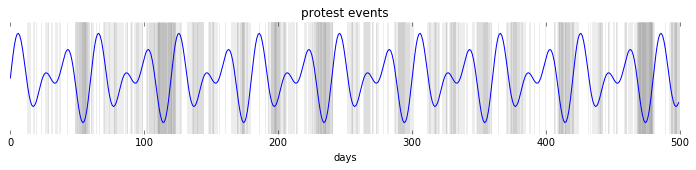

In [6]:
period1 = 20
sine1 = np.sin(2*np.pi*np.arange(npts)/(period1))

period2 = 30
sine2 = np.sin(2*np.pi*np.arange(npts)/(period2))

sinsum = sine1+sine2
sinsum /= sinsum.max()
sinsum *= .4
sinsum += .5

data = np.random.geometric(p=sinsum, size=npts)-1

plt.figure(figsize=(12,2))
plt.vlines(x=range(npts), ymin=0, ymax=1, linewidth=data, alpha=.07)
plt.plot(sinsum)
plt.xlabel('days')
plt.yticks([])
plt.box('off')
plt.title('protest events');

Here we see strong autocorrelation again at the lower end of the range, indicating clumps, and strong autocorrelation when the overall pattern repeats itself. It is harder, however, to make out the periods of the two underlying sin functions just by looking for strong autocorrelation.

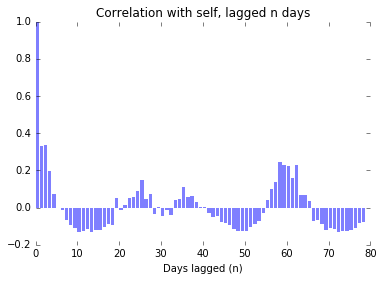

In [7]:
nlags = 80
plt.bar(range(nlags+1), stattools.acf(data, nlags=nlags), alpha=.5, linewidth=0)
plt.title('Correlation with self, lagged n days')
plt.xlabel('Days lagged (n)')
plt.box('off')
plt.xlim(0,80);

### Stochasticly Autocorrelated 

We can also construct a dataset that is autocorrelated, but there are not fundamental underlying periodicities. To do this we just make the likelihood of a protest be contingent on the presence of a protest on the preceeding day. 

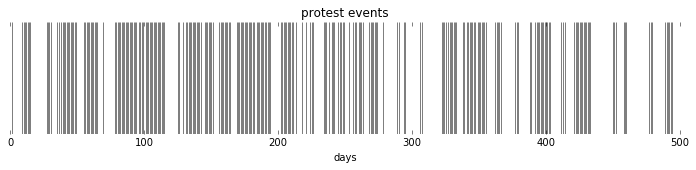

In [8]:
data = [0]
for i in range(npts):
    if data[-1]>0:
        data.append(np.random.binomial(1, .8))
    else:
        data.append(np.random.binomial(1, .2))
        
plt.figure(figsize=(12,2))
plt.vlines(x=range(npts), ymin=0, ymax=1, linewidth=data, alpha=.5)
plt.xlabel('days')
plt.yticks([])
plt.box('off')
plt.title('protest events');       

When we look at a chart of the autocorrelation, we see the presence of autocorrelation around 0, which we expect. We also see, however peaks in autocorrelation that arise due to randomness, but are likewise hard to distinguish from the peaks we saw in the case of the complex underlying periodic function, when we only look at one timeseries.

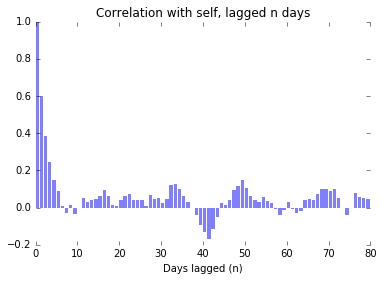

In [9]:
nlags = 80
plt.bar(range(nlags+1), stattools.acf(data, nlags=nlags), alpha=.5, linewidth=0)
plt.title('Correlation with self, lagged n days')
plt.xlabel('Days lagged (n)')
plt.box('off')
plt.xlim(0,80);

Indeed, if we try this experiment a number of times, and plot the autocorrelation graphs one on top of the other, we see that while the initial part of the chart showing that clustering exists is relatively well established, the remainder of the graph is essentially dominated by noise, and untrustworthy.

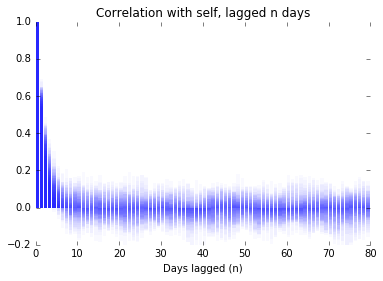

In [10]:
nlags = 80
for i in range(100): 
    data = [0]
    for i in range(npts):
        if data[-1]>0:
            data.append(np.random.binomial(1, .8))
        else:
            data.append(np.random.binomial(1, .2))
    plt.bar(range(nlags+1), stattools.acf(data, nlags=nlags), alpha=.025, linewidth=0)
    
plt.title('Correlation with self, lagged n days')
plt.xlabel('Days lagged (n)')
plt.box('off')
plt.xlim(0,80)
plt.ylim(-.2,1);

### The Challenge

It seems that we can have confidence using this method to identify that clusters exist in the timeseries. On the other hand, when we look at real-world timeseries, we will only have one example to work with, and so should be distrustful of any indications of periodicity we see, as we have no way to show that they are due to periodicity in an underlying function, or if they arise due to the peculiarities of the clustering process.